# Deeper Dive: Decision Tree and Random Forest 

### Start with your typical imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Hospital Survival Dataset
* Read in the files __`train.csv`__ and __`test.csv`__ from the data directory into two separate dataframes

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Investigate the structure of the data

In [3]:
train

,PatientId,healed,Hospitalclass,Name,Sex,Age
0,1,0,3,"Alfred, Mr. Abraham",male,22.0
1,2,1,1,"Addison, Mrs. Abramson",female,38.0
2,3,1,3,"Alma, Miss. Adam",female,26.0
3,4,1,1,"Alvina, Mrs. Albertson",female,35.0
4,5,0,3,"Almond, Mr. Arrington",male,35.0
5,6,0,3,"Alston, Mr. Aston",male,NaN
6,7,0,1,"Alvin, Mr. Barton",male,54.0
7,8,0,3,"Arden, Master. Chester",male,2.0
8,9,1,3,"Amanda, Mrs. Norman",female,27.0
9,10,1,2,"Angela, Mrs. Norris",female,14.0


In [4]:
test

,PatientId,healed,Hospitalclass,Name,Sex,Age
0,22,0,3,"Thomas, Mr. John",male,34
1,23,1,3,"Wiliam, Mrs. Jeny",female,47
2,24,1,2,"Winter, Mr. Thomas",male,62
3,25,0,3,"Paul, Mr. Fred",male,27
4,26,1,3,"Smith, Mrs. Sara",female,22
5,27,0,3,"Solomon, Mr. Johanatan",male,14
6,28,0,3,"Stark, Miss. Katy",female,30
7,29,1,2,"Stamp, Mr. Tim",male,26
8,30,0,3,"Odel, Mrs. Mary",female,18


### Investigate the structure of the data

In [5]:
train.head()

,PatientId,healed,Hospitalclass,Name,Sex,Age
0,1,0,3,"Alfred, Mr. Abraham",male,22.0
1,2,1,1,"Addison, Mrs. Abramson",female,38.0
2,3,1,3,"Alma, Miss. Adam",female,26.0
3,4,1,1,"Alvina, Mrs. Albertson",female,35.0
4,5,0,3,"Almond, Mr. Arrington",male,35.0


## Setup the Training data
* Capture the __`healed`__ column as a separate data frame and remove the __`PatientId`__, __`Name`__, and __`healed`__ columns from the training data. (You will need to specify the axis.)

In [6]:
output = train[['healed']]
train = train.drop(['PatientId', 'Name', 'healed'], axis=1)

### Turn the training data __`Sex`__ column into binary features

In [7]:
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)

### Verify the new structure of the training data

In [8]:
train

,Hospitalclass,Age,Sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
5,3,NaN,1
6,1,54.0,1
7,3,2.0,1
8,3,27.0,0
9,2,14.0,0


### Fill the null age values with something reasonable

In [9]:
train = train.fillna(train.mean())

## Create a RandomForestClassifier and train it on the training data and output __`healed`__ column

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=2,n_estimators=50)
forest.fit(train, output['healed'])

/Users/dws/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Set Up the Test Data
* Pull the __`healed`__ column out of the test data and then remove it. Do the same for the 'PatiendId' and 'Name' columns from the test data. Turn the test data __`Sex`__ column into binary features

In [11]:
test_output = test[['healed']]
test = test.drop(['PatientId', 'Name', 'healed'], axis=1)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

## Verify the structure of the test data

In [12]:
test

,Hospitalclass,Age,Sex_male
0,3,34,1
1,3,47,0
2,2,62,1
3,3,27,1
4,3,22,0
5,3,14,1
6,3,30,0
7,2,26,1
8,3,18,0


## Generate predictions for the test data from the RandomForestClassifier and inspect them

In [13]:
preds = forest.predict(test)
preds

array([0, 0, 0, 0, 1, 0, 0, 1, 0])

## Importance Analysis
* Copy the code from the earlier RandomForestClassifier example for getting the importances, indices and features

In [14]:
importances = forest.feature_importances_
indices = np.argsort(importances)
features = train.columns[0:4]

## Copy the code from the earlier RandomForestClassifier example for plotting the Features imporances

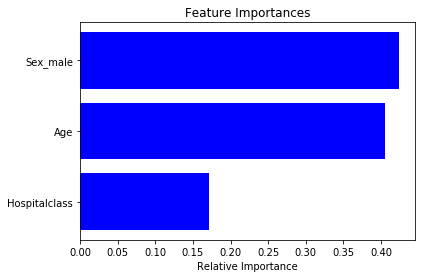

In [15]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

## Generate a crosstab table as in the earlier RandomForestClassifier example 

In [ ]:
pd.crosstab(index=test_output['healed'], columns=preds, rownames=['actual'],
            colnames=['preds'])

## Handling Missing Age Data
* If you have time, change the manner in which you handled missing age data and see if that impacts the predictions